###  mapsim

Exploring the mapping strategy based on Kataza-san's mapsim1.py

In [28]:
import numpy as np
import math
import svgwrite
from docopt import docopt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib import patches

Set Effective Focal Length (EFL) per Cell size, M, (mm/$\mu$m). This needs to be a mutiple of 20. 

In [29]:
efl_per_cellsize = 5680

Set the other model parameters

In [30]:
cells_per_pix = 13
pixel_size = 10
efl = efl_per_cellsize*pixel_size/cells_per_pix
pfov = 10e-3/efl * 180/math.pi
num_pixels = 1952
chip_spacing_a = 22.4/efl * 180/math.pi
chip_spacing_b = 22.4/efl * 180/math.pi

In [70]:
print(' EFL (mm)=', efl)
print(' chip spacing A and B (deg)=', chip_spacing_a, chip_spacing_b)
chip_width = num_pixels*pfov
print(' chip width (deg) =', chip_width)

 EFL (mm)= 4369.2307692307695
 chip spacing A and B (deg)= 0.2937417428558023 0.2937417428558023
 chip width (deg) = 0.2559749473457706


Compute the gap between the chip.

In [72]:
gap_spacing = chip_spacing_a-chip_width
print(' gap spacing (deg)=', gap_spacing)

 gap spacing (deg)= 0.0377667955100317


Set field parameters of the JASMINE Galactic centre field, a square field of $|l|<0.7$ deg and $|b|<0.7$ deg, and a rectoangular region of $-0.7<l<-1.5$ deg and $|b|<0.3$ deg.

In [75]:
glon_high_sq = 0.7
glon_low_sq = -0.7
glat_high_sq = 0.7
glat_low_sq = -0.7
glon_high_ra = -0.7
glon_low_ra = -1.5
glat_high_ra = 0.3
glat_low_ra = -0.3

In [78]:
print(' size of square / gap space=', (glon_high_sq-glon_low_sq)/gap_spacing)
print(' size of rectogangular / gap space in longitude =', (glon_high_ra-glon_low_ra)/gap_spacing)
print(' size of rectogangular / gap space in latitude =', (glat_high_ra-glat_low_ra)/gap_spacing)

 size of square / gap space= 37.06959992483685
 size of rectogangular / gap space in longitude = 21.1826285284782
 size of rectogangular / gap space in latitude = 15.88697139635865


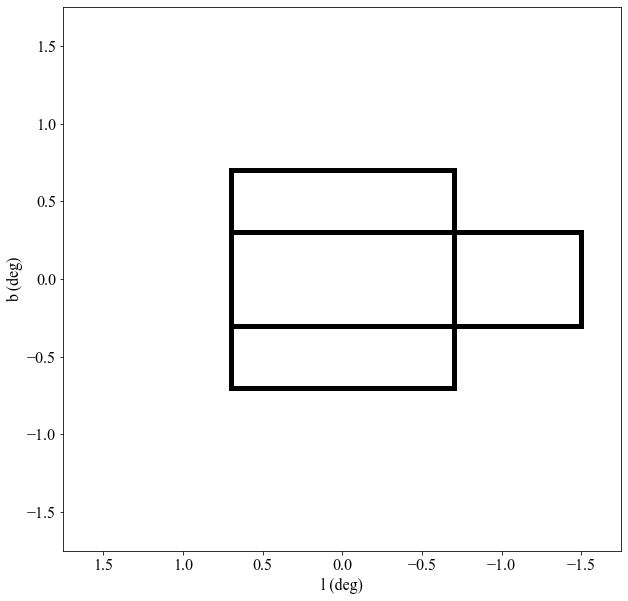

In [67]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.75, -1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# square region
ax.add_patch(patches.Rectangle((glon_low_sq, glat_low_sq), glon_high_sq-glon_low_sq, glat_high_sq-glat_low_sq, lw=5, fc='black', fill = None))
# rectoangular region
ax.add_patch(patches.Rectangle((glon_low_ra, glat_low_ra), glon_high_ra-glon_low_ra, glat_high_ra-glat_low_ra, lw=5, fc='black', fill = None))


In [109]:
def add_small_frame(ax, cen_x, cen_y, alp):
    # bottom left
    xl = cen_x-chip_width-0.5*gap_spacing
    yl = cen_y-chip_width-0.5*gap_spacing
    ax.add_patch(patches.Rectangle((xl, yl), chip_width, chip_width, fc='red', fill = True, alpha = alp))
    # bottom right
    xl = cen_x+0.5*gap_spacing
    ax.add_patch(patches.Rectangle((xl, yl), chip_width, chip_width, fc='red', fill = True, alpha = alp))
    # top right
    yl = cen_y+0.5*gap_spacing
    ax.add_patch(patches.Rectangle((xl, yl), chip_width, chip_width, fc='red', fill = True, alpha = alp))
    # top left
    xl = cen_x-chip_width-0.5*gap_spacing
    ax.add_patch(patches.Rectangle((xl, yl), chip_width, chip_width, fc='red', fill = True, alpha = alp))

Plot small frame mappings

Let's plot the first point

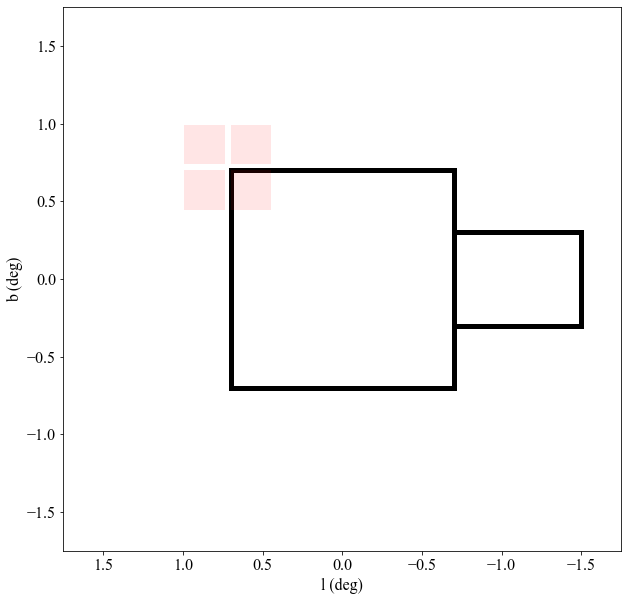

In [111]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.75, -1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# square region
ax.add_patch(patches.Rectangle((glon_low_sq, glat_low_sq), glon_high_sq-glon_low_sq, glat_high_sq-glat_low_sq, lw=5, fc='black', fill = None))
# rectoangular region
ax.add_patch(patches.Rectangle((glon_low_ra, glat_low_ra), glon_high_ra-glon_low_ra, glat_high_ra-glat_low_ra, lw=5, fc='black', fill = None))

# starting central position
xs = glon_high_sq+0.5*gap_spacing
ys = glat_high_sq+0.5*gap_spacing
add_small_frame(ax, xs, ys, 0.1)  
    

Let's do first 5x5 first

number of small frame = 25


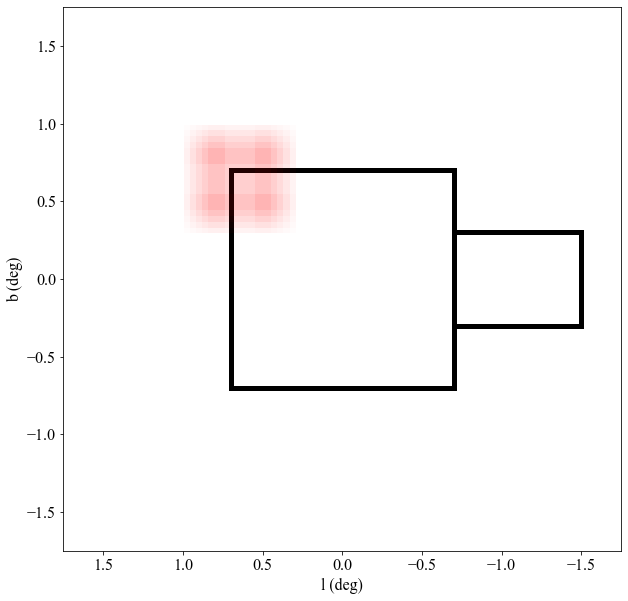

In [112]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.75, -1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# square region
ax.add_patch(patches.Rectangle((glon_low_sq, glat_low_sq), glon_high_sq-glon_low_sq, glat_high_sq-glat_low_sq, lw=5, fc='black', fill = None))
# rectoangular region
ax.add_patch(patches.Rectangle((glon_low_ra, glat_low_ra), glon_high_ra-glon_low_ra, glat_high_ra-glat_low_ra, lw=5, fc='black', fill = None))

# add small frame for the square field.
nx = 5
ny = 5
# starting central position
xs = glon_high_sq+0.5*gap_spacing
ys = glat_high_sq+0.5*gap_spacing
dx = gap_spacing
dy = gap_spacing
# number of small frame
nsf = 0
xc = xs
for ix in range(nx):
    yc = ys
    for iy in range(ny):
        add_small_frame(ax, xc, yc, 0.01)    
        yc = yc-dy
        nsf = nsf+1
    xc = xc-dx
    
print('number of small frame =', nsf)
    

number of small frame = 1705


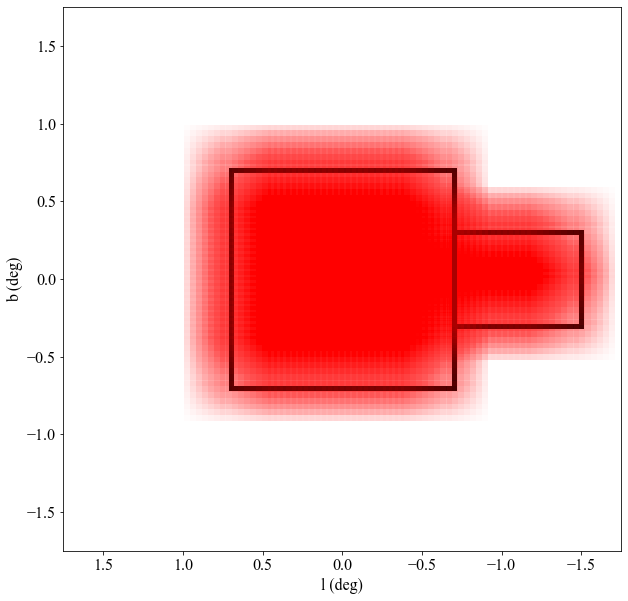

In [132]:
plt.figure(figsize=(10, 10))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stixsans"
plt.rcParams["font.size"] = 16
ax  = plt.gca()
# ax.tick_params(labelsize=16, color='k', direction="in")
ax.set_xlim(1.75, -1.75)
ax.set_ylim(-1.75, 1.75)
ax.set_xlabel('l (deg)')
ax.set_ylabel('b (deg)')
# square region
ax.add_patch(patches.Rectangle((glon_low_sq, glat_low_sq), glon_high_sq-glon_low_sq, glat_high_sq-glat_low_sq, lw=5, fc='black', fill = None))
# rectoangular region
ax.add_patch(patches.Rectangle((glon_low_ra, glat_low_ra), glon_high_ra-glon_low_ra, glat_high_ra-glat_low_ra, lw=5, fc='black', fill = None))

# add small frame for the square field.
nx = 37
ny = 37
# starting central position
xs = glon_high_sq+0.5*gap_spacing
ys = glat_high_sq+0.5*gap_spacing
dx = gap_spacing
dy = gap_spacing
# number of small frame
nsf = 0
xc = xs
for ix in range(nx):
    yc = ys
    for iy in range(ny):
        add_small_frame(ax, xc, yc, 0.01)    
        yc = yc-dy
        nsf = nsf+1
    xc = xc-dx
    
# add small frame for the rectangular field.
nx = 21
ny = 16
# starting central position
xs = glon_high_ra+0.5*gap_spacing
ys = glat_high_ra+0.5*gap_spacing
dx = gap_spacing
dy = gap_spacing
# number of small frame
xc = xs
for ix in range(nx):
    yc = ys
    for iy in range(ny):
        add_small_frame(ax, xc, yc, 0.01)    
        yc = yc-dy
        nsf = nsf+1
    xc = xc-dx
    
print('number of small frame =', nsf)
    

Let's assume the number of small frame observed by each orbit is nsf_orb.

In [133]:
nsf_orb = 8
norb_lf = nsf/nsf_orb
print(' Number of orbit to survey the whole large frame =',norb_lf)
# obs time per orbit : 50 min (s)
t_obs_orb = 50.0*60.0
print(' obs time per orbit (s)=', t_obs_orb)
# time for maneuver (s)
t_mv = 120
# exposure time + read out
t_exp = 13.5
# number of exp per small frame
n_exp = (t_obs_orb-t_mv*(nsf_orb-1))/(t_exp*nsf_orb)
print(' number of exposure per small frame =', n_exp)


 Number of orbit to survey the whole large frame = 213.125
 obs time per orbit (s)= 3000.0
 number of exposure per small frame = 20.0


The maximum number of observation per star in the full survey.

In [134]:
# number of small frame per star per large frame
nsf_lf = int(2*chip_width/gap_spacing)**2
print('Number of shift to move across field width=', (chip_width*2)/gap_spacing)
print('Max number of observation for a star=', nsf_lf)

Number of shift to move across field width= 13.555555555555564
Max number of observation for a star= 169


In [135]:
# number of orbit in 3 years
norb_mission = 6000
# total number of obs
nt_obs = int(norb_mission*nsf_lf*n_exp/norb_lf)
print('total number of obs per star=', nt_obs)
# centroid accuracy for one exposure (mas)
sig_exp = 4.0
# final astrometric accuracy
print(' astrometric accuracy (mas) = ', sig_exp/np.sqrt(nt_obs))

total number of obs per star= 95155
 astrometric accuracy =  0.01296713954589571
